In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
fraud=pd.read_csv("Fraud_Loan_Prediction.csv")

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [3]:
fraud.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
fraud.shape

(614, 13)

In [3]:
data=fraud.drop("Loan_ID",axis=1)

In [6]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
#Check Duplicates
data.duplicated().sum()

0

In [9]:
#Check Missing Values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

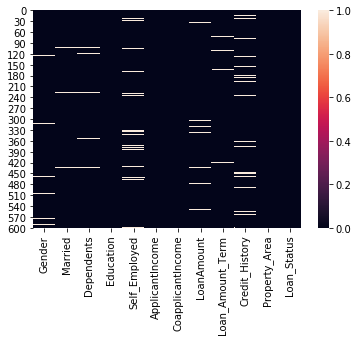

In [10]:
sns.heatmap(data.isnull())

In [4]:
#We can consider these methods to fill the missing values:
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [5]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [6]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [7]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [8]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [10]:
data['Gender']= le.fit_transform(data['Gender']) 
data['Married']= le.fit_transform(data['Married']) 
data['Education']= le.fit_transform(data['Education']) 
data['Self_Employed']= le.fit_transform(data['Self_Employed']) 
data['Property_Area']= le.fit_transform(data['Property_Area']) 
data['Loan_Status']= le.fit_transform(data['Loan_Status']) 

In [11]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [13]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [15]:
data = data[data.Dependents != '3+']
print('3+' in data.Dependents)

False


In [16]:
data.shape

(563, 12)

In [17]:
data.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [18]:
data.Dependents = data.Dependents.astype('float')
data.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Outlier Treatment

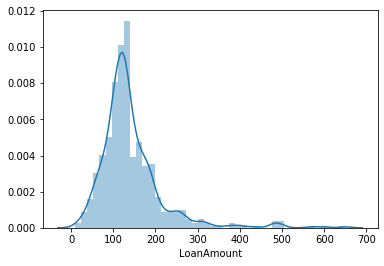

In [19]:
sns.distplot(data["LoanAmount"])

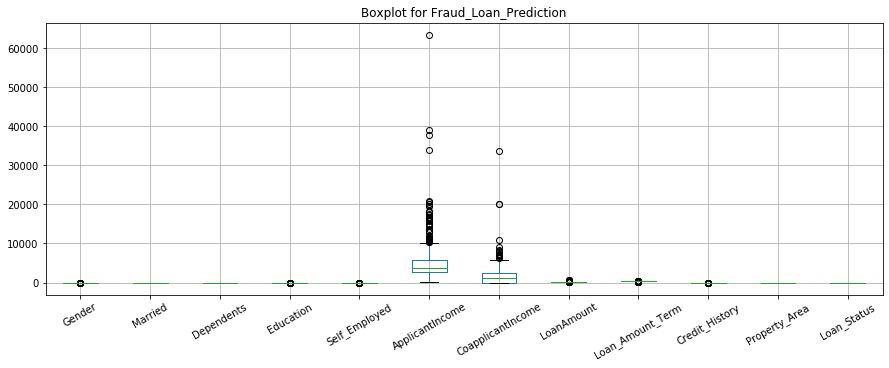

In [20]:
data.plot(kind='box',grid=True,title="Boxplot for Fraud_Loan_Prediction",legend=True,rot=30,figsize=(15,5))

In [21]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score < 3).all(axis=1)]
print(data.shape)

(563, 12)
(529, 12)


In [22]:
#Check Skewness
data.skew()

Gender              -1.531186
Married             -0.546208
Dependents           1.039569
Education            1.347456
Self_Employed        2.304047
ApplicantIncome      2.123411
CoapplicantIncome    1.185647
LoanAmount           0.950539
Loan_Amount_Term    -2.136858
Credit_History      -2.037603
Property_Area       -0.090735
Loan_Status         -0.843136
dtype: float64

In [23]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])
    if data.skew().loc[col]<=0.55:
        data[col]=np.log1p(data[col])

In [24]:
data.skew()

Gender              -1.531186
Married             -0.546208
Dependents           0.842386
Education            1.347456
Self_Employed        2.304047
ApplicantIncome     -0.899016
CoapplicantIncome   -0.271364
LoanAmount          -1.408315
Loan_Amount_Term    -2.826781
Credit_History      -2.037603
Property_Area       -0.455925
Loan_Status         -0.843136
dtype: float64

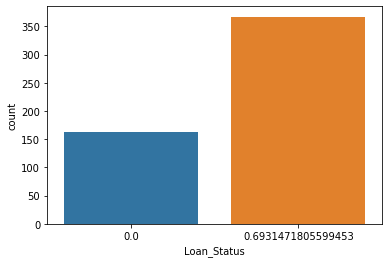

In [30]:
sns.countplot(x='Loan_Status',data=data)

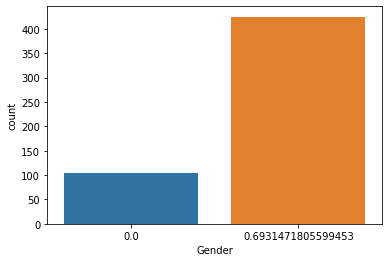

In [31]:
sns.countplot(x='Gender',data=data)

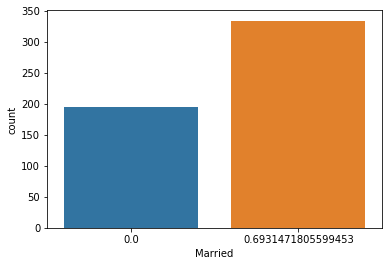

In [379]:
sns.countplot(x='Married',data=data)

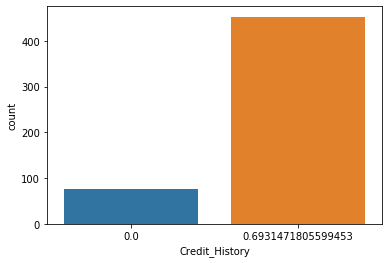

In [380]:
sns.countplot(x='Credit_History',data=data)

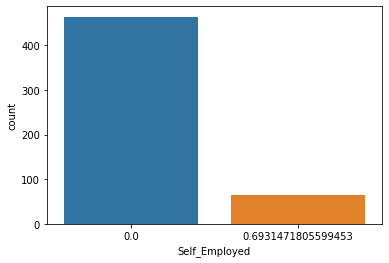

In [381]:
sns.countplot(x='Self_Employed',data=data)

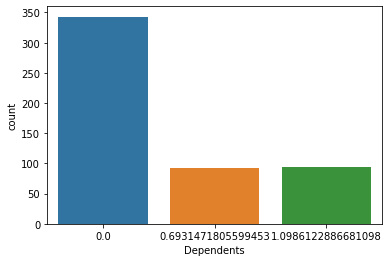

In [382]:
sns.countplot(x='Dependents',data=data)

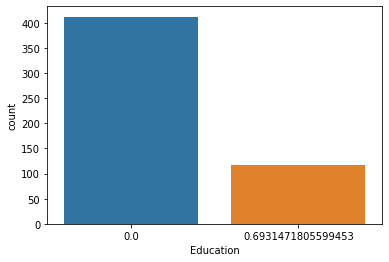

In [383]:
sns.countplot(x='Education',data=data)

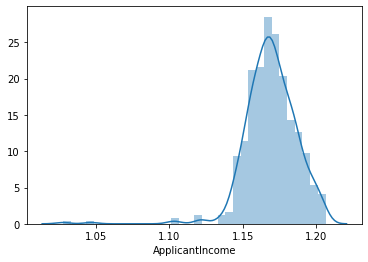

In [333]:
sns.distplot(data['ApplicantIncome'].dropna())

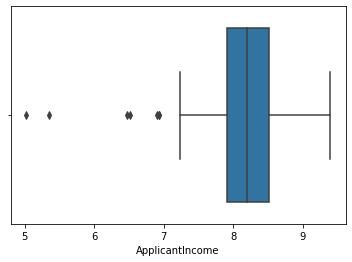

In [120]:
sns.boxplot(data['ApplicantIncome'].dropna())

Bivarient Analysis

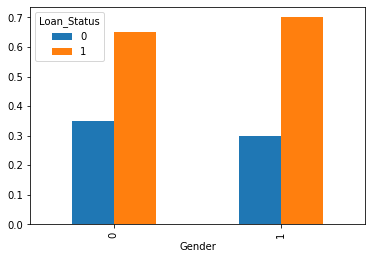

In [121]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar")

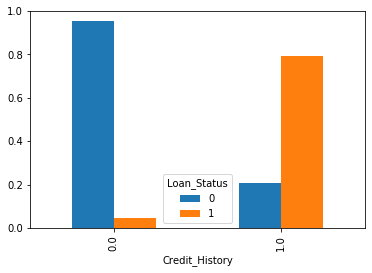

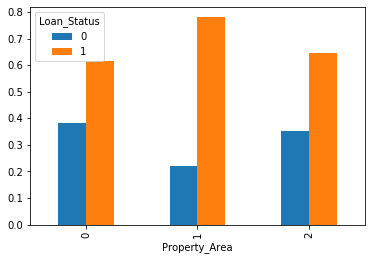

In [122]:
Credit_History=pd.crosstab(data['Credit_History'],
                           data['Loan_Status']) 
Property_Area=pd.crosstab(data['Property_Area'],
                          data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()

Summary Statistics

In [34]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.556876,0.437639,0.315764,0.153305,0.085169,2.225499,1.227743,1.758378,5.843762,0.593565,0.631181,0.480879
std,0.275735,0.334712,0.445750,0.287953,0.227770,0.061047,1.071142,0.075231,0.182882,0.243353,0.436119,0.319795
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.794635,0.000000,1.194706,5.198497,0.000000,0.000000,0.000000
25%,0.693147,0.000000,0.000000,0.000000,0.000000,2.188468,0.000000,1.725463,5.888878,0.693147,0.000000,0.000000
50%,0.693147,0.693147,0.000000,0.000000,0.000000,2.221448,2.100578,1.766789,5.888878,0.693147,0.693147,0.693147
75%,0.693147,0.693147,0.693147,0.000000,0.000000,2.262856,2.165723,1.805236,5.888878,0.693147,1.098612,0.693147
max,0.693147,0.693147,1.098612,0.693147,0.693147,2.380222,2.305391,1.917234,6.175867,0.693147,1.098612,0.693147


In [35]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361483,0.157564,0.045864,-0.017693,0.038235,0.251806,0.186876,-0.100838,0.000795,-0.033531,0.022199
Married,0.361483,1.000000,0.336373,0.020096,-0.024345,-0.046426,0.375531,0.208573,-0.113912,0.022174,0.022097,0.104424
Dependents,0.157564,0.336373,1.000000,0.040690,0.052196,0.076482,0.062584,0.105286,-0.072126,-0.004761,0.074831,0.036770
Education,0.045864,0.020096,0.040690,1.000000,-0.005219,-0.154937,0.082101,-0.081946,-0.094349,-0.080392,-0.090441,-0.080733
Self_Employed,-0.017693,-0.024345,0.052196,-0.005219,1.000000,0.185056,-0.114106,0.081529,-0.040559,-0.027278,-0.008289,-0.051151
ApplicantIncome,0.038235,-0.046426,0.076482,-0.154937,0.185056,1.000000,-0.367862,0.361316,-0.060347,0.000455,0.024560,-0.003734
CoapplicantIncome,0.251806,0.375531,0.062584,0.082101,-0.114106,-0.367862,1.000000,0.193378,-0.018734,0.044276,-0.073429,0.097935
LoanAmount,0.186876,0.208573,0.105286,-0.081946,0.081529,0.361316,0.193378,1.000000,0.038241,-0.014363,-0.086236,-0.010486
Loan_Amount_Term,-0.100838,-0.113912,-0.072126,-0.094349,-0.040559,-0.060347,-0.018734,0.038241,1.000000,0.038636,-0.061797,-0.026181
Credit_History,0.000795,0.022174,-0.004761,-0.080392,-0.027278,0.000455,0.044276,-0.014363,0.038636,1.000000,0.015662,0.569730


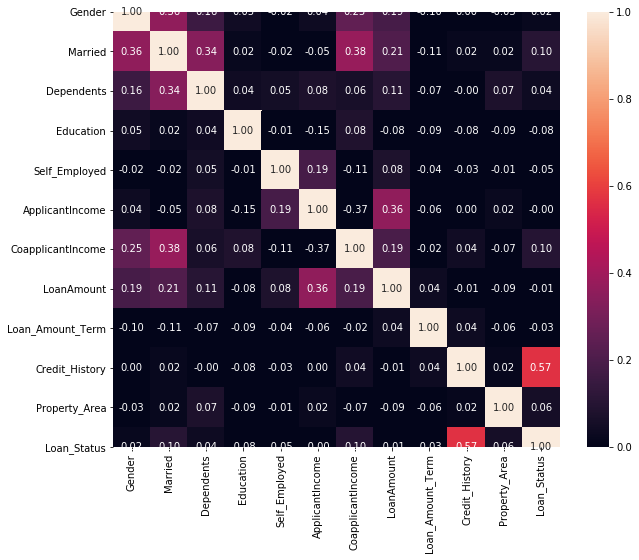

In [36]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [26]:
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [27]:
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.693147,0.000000,0.000000,0.0,0.0,2.269462,0.000000,1.768118,5.888878,0.693147,1.098612
1,0.693147,0.693147,0.693147,0.0,0.0,2.243931,2.118566,1.768118,5.888878,0.693147,0.000000


In [28]:
y.head(2)

0    0.693147
1    0.000000
Name: Loan_Status, dtype: float64

In [29]:
y=y.round().astype(int)
y.unique()

array([1, 0], dtype=int64)

In [30]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(529, 1)

Standardisation

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 0.49467755, -1.30874769, -0.70905826, ...,  0.24692935,
         0.40959788,  1.07281175],
       [ 0.49467755,  0.76408922,  0.84742668, ...,  0.24692935,
         0.40959788, -1.44863721],
       [ 0.49467755,  0.76408922, -0.70905826, ...,  0.24692935,
         0.40959788,  1.07281175],
       ...,
       [ 0.49467755,  0.76408922,  0.84742668, ...,  0.24692935,
         0.40959788,  1.07281175],
       [ 0.49467755,  0.76408922,  1.75791201, ...,  0.24692935,
         0.40959788,  1.07281175],
       [-2.02151885, -1.30874769, -0.70905826, ...,  0.24692935,
        -2.44141891,  0.14221996]])

Spilt Train and Test

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [34]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  32 which gives accuracy score of:  0.8742138364779874
confusion matrix:  [[ 17  27]
 [  2 113]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.39      0.54        44
           1       0.81      0.98      0.89       115

    accuracy                           0.82       159
   macro avg       0.85      0.68      0.71       159
weighted avg       0.83      0.82      0.79       159

fpr:  [0.         0.61363636 1.        ]
tpr:  [0.        0.9826087 1.       ]
thresholds:  [2 1 0]
roc_auc:  0.6844861660079051

prediction:  [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1]


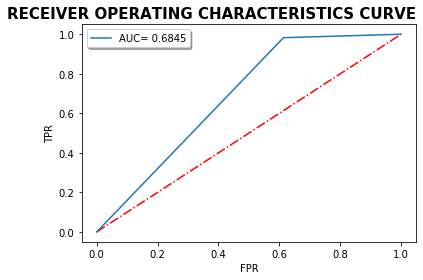

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [46]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=60).mean()
accuracy_score_1

0.8235185185185185

KNN

In [42]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(10,30),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=100)
kn_g.fit(x,y)
kn_g.best_params_

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 20, 'n_neighbors': 12}

random_state for mod  is  121 which gives accuracy score of:  0.8742138364779874
confusion matrix:  [[ 17  27]
 [  2 113]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.39      0.54        44
           1       0.81      0.98      0.89       115

    accuracy                           0.82       159
   macro avg       0.85      0.68      0.71       159
weighted avg       0.83      0.82      0.79       159

fpr:  [0.         0.61363636 1.        ]
tpr:  [0.        0.9826087 1.       ]
thresholds:  [2 1 0]
roc_auc:  0.6844861660079051

prediction:  [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1]


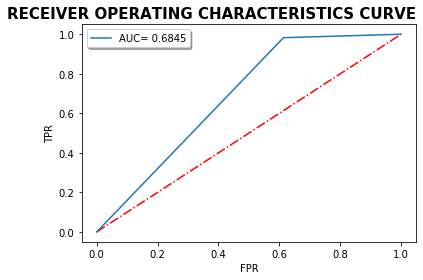

In [43]:
kn=KNeighborsClassifier(n_neighbors=12,leaf_size=20)
knn=rst(kn,x,y)

In [44]:
#Cross Validation
accuracy_score_2=cross_val_score(kn,x,y,scoring='accuracy',cv=100).mean()
accuracy_score_2

0.8251666666666666

DecisionTree

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 3}

random_state for mod  is  87 which gives accuracy score of:  0.8936170212765957
confusion matrix:  [[20 32]
 [ 1 88]]
classification report:                precision    recall  f1-score   support

           0       0.95      0.38      0.55        52
           1       0.73      0.99      0.84        89

    accuracy                           0.77       141
   macro avg       0.84      0.69      0.70       141
weighted avg       0.81      0.77      0.73       141

fpr:  [0.         0.61538462 1.        ]
tpr:  [0.         0.98876404 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6866897147796024

prediction:  [1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


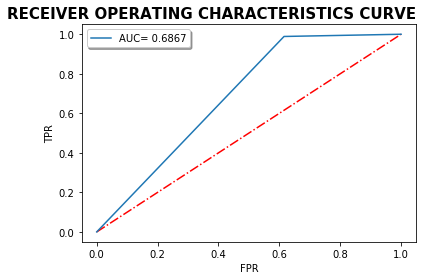

In [178]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc=rst(dt,x,y)

In [188]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.8099483502929388

GaussianNB

random_state for mod  is  32 which gives accuracy score of:  0.8805031446540881
confusion matrix:  [[ 17  27]
 [  2 113]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.39      0.54        44
           1       0.81      0.98      0.89       115

    accuracy                           0.82       159
   macro avg       0.85      0.68      0.71       159
weighted avg       0.83      0.82      0.79       159

fpr:  [0.         0.61363636 1.        ]
tpr:  [0.        0.9826087 1.       ]
thresholds:  [2 1 0]
roc_auc:  0.6844861660079051

prediction:  [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1]


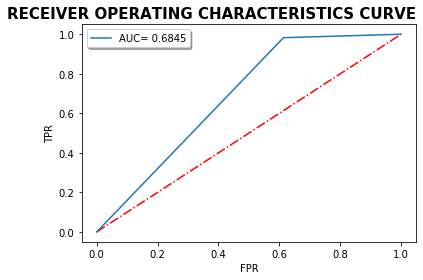

In [59]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [61]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=100).mean()
accuracy_score_4

0.8201666666666667

Gradient Boosting

In [67]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters: {'learning_rate': 0.025, 'n_estimators': 250}

 best score: 0.8108108108108109


random_state for mod  is  32 which gives accuracy score of:  0.8805031446540881
confusion matrix:  [[ 18  26]
 [  3 112]]
classification report:                precision    recall  f1-score   support

           0       0.86      0.41      0.55        44
           1       0.81      0.97      0.89       115

    accuracy                           0.82       159
   macro avg       0.83      0.69      0.72       159
weighted avg       0.82      0.82      0.79       159

fpr:  [0.         0.59090909 1.        ]
tpr:  [0.         0.97391304 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.691501976284585

prediction:  [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1]


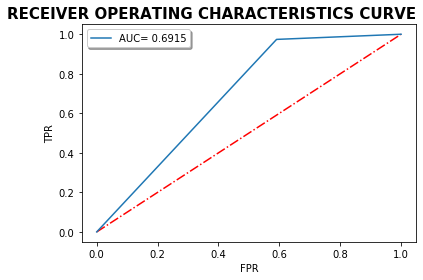

In [68]:
gb=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
gbc=rst(gb,x,y)

In [69]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_6

0.8076750700280113

In [ ]:
import joblib
joblib.dump(kn,"KNN Classifier for Auto_mpg_dataset.pkl")